<a href="https://colab.research.google.com/github/Riyan081/Python-CDAC/blob/main/Copy_of_23102B0002_ML_LAB_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import preprocessor
import helper

%matplotlib inline

In [3]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

df = preprocessor.preprocess(df, region_df)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False


## Overall statistics

In [4]:
print("Total Editipns:", df['Year'].nunique() - 1)
print("Total host cities:", df['City'].nunique())
print("total sports:", df['Sport'].nunique())
print("Total events:", df['Event'].nunique())
print("Total athletes:", df['Name'].nunique())
print("Total nations:", df['region'].nunique())

Total Editipns: 28
Total host cities: 23
total sports: 52
Total events: 651
Total athletes: 116122
Total nations: 205


### Growth of participating nations over time

In [5]:
nations_over_time = helper.data_over_time(df, 'region')

px.line(nations_over_time,
        x = "Edition",
        y = "region",
        title = "Participating nations over years")

### Events over time

In [6]:
events_over_time = helper.data_over_time(df, 'Event')
px.line(events_over_time,
        x = "Edition",
        y = "Event",
        title = "Events over years")

### Distribution of events across sports and years

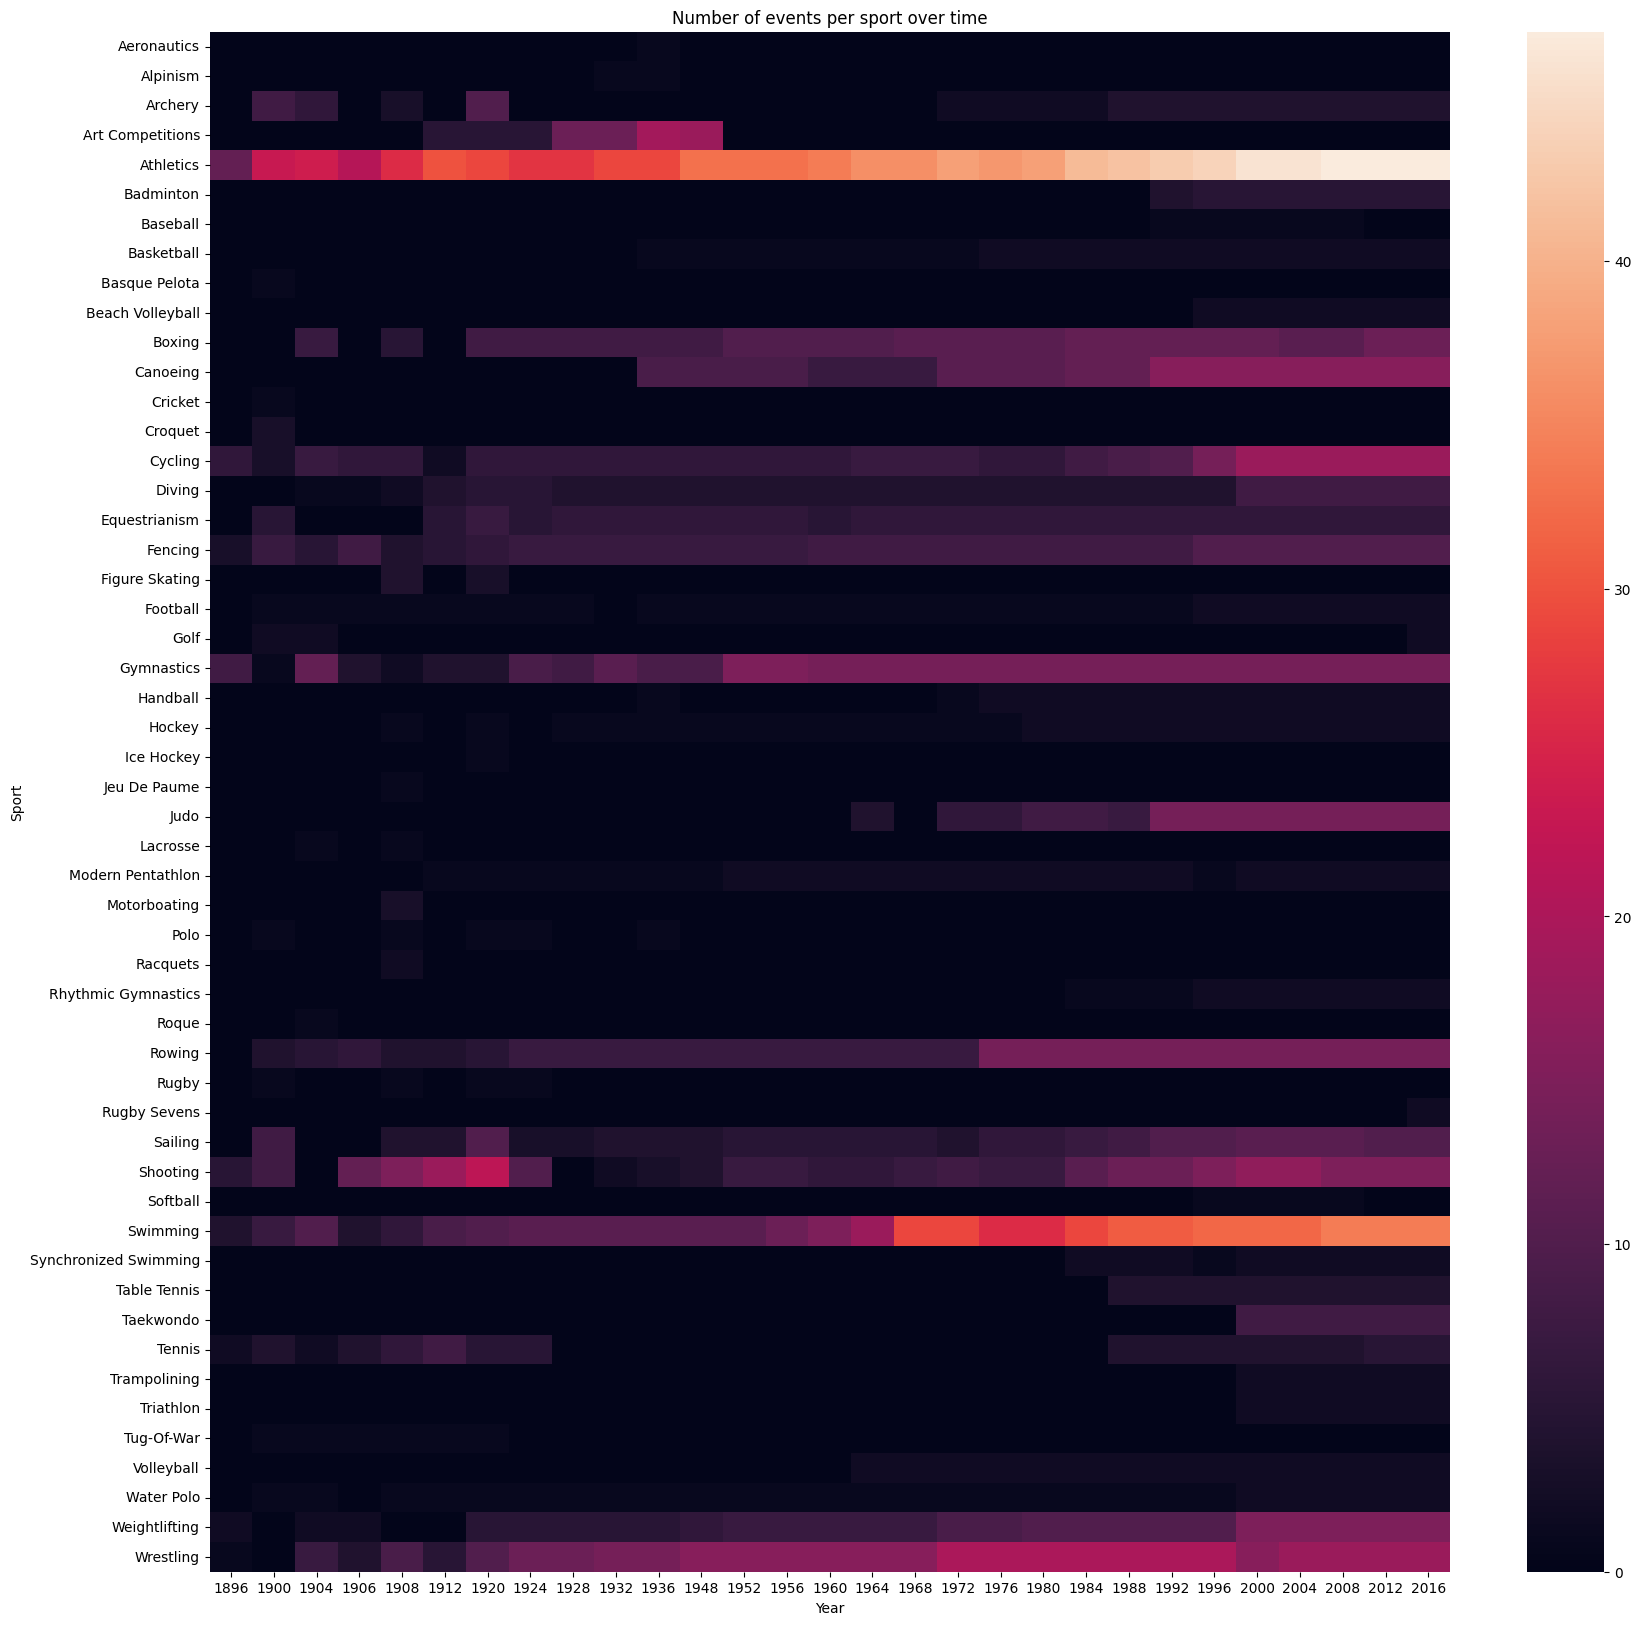

In [7]:
plt.figure(figsize = (20,20))
x = df.drop_duplicates(['Year', 'Sport', 'Event'])
sns.heatmap(
    x.pivot_table(index='Sport',
                  columns='Year',
                  values='Event',
                  aggfunc='count').fillna(0).astype(int),
    annot=False
)
plt.title("Number of events per sport over time")
plt.show()

### Overalll Medal tally

### Country wise performance analysis (India)

In [8]:
selected_country = 'India'
country_df = helper.yearwise_medal_tally(df, selected_country)
px.line(country_df,
        x="Year",
        y="Medal",
        title="India medal tally over the years")

### Top athletes of a country

In [9]:
helper.most_successful_countrywise(df, selected_country)

,Name,Medals
0,Anant Ram,15
1,Leander Adrian Paes,11
2,Gagan Narang,10
3,Vithal Karande,8
4,Jagmal More,8
5,Trilok Singh,8
6,Bandu Bhosle,8
7,Darshan Mondal,8
8,Khushi Ram,7
9,Sham Lal,7


### Age distribution of athletes

In [10]:
athlete_df = df.drop_duplicates(['Name','region'])
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
fig = ff.create_distplot(
    [x1,x2],
    ['Overall athletes', 'Gold medalists'],
    show_hist=True)
fig

### Height vs Weight analysis

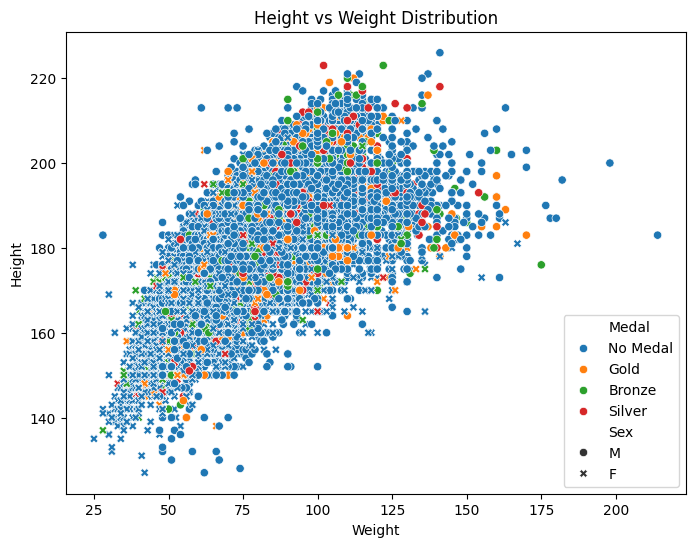

In [11]:
temp_df = helper.weight_v_height(df, 'Overall')

plt.figure(figsize=(8,6))
sns.scatterplot(x=temp_df['Weight'],
                y=temp_df['Height'],
                hue=temp_df['Medal'],
                style=temp_df['Sex'])
plt.title("Height vs Weight Distribution")
plt.show()

### Gender participation overtime

In [12]:
final = helper.men_vs_women(df)

px.line(final,
        x="Year",
        y=["Male","Female"],
        title="Male vs Female Participation Over Years")

## 🧾 Conclusion

From the analysis:

- Olympic participation has increased significantly over time.
- The number of sports and events has grown steadily.
- Some countries dominate medal tallies consistently.
- Athlete demographics vary across sports.
- Female participation has increased considerably in recent decades.

This analysis demonstrates trends, performance patterns, and demographic insights in Olympic history.